# Lecture 11: Thyroid Example

In [2]:
# load imports
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [3]:
#load dataset
thyroid_df = pd.read_csv('thyroid_data.csv')

thyroid_df.shape

(383, 17)

In [4]:
#look at dataframe
thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
#look at data on recuurance
thyroid_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [6]:
# define list of column names to one hot encode
cols_to_exclude = ['Age', 'Recurred']

categorical_cols = [col for col in thyroid_df.columns if col not in cols_to_exclude]

categorical_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [7]:
#define the one hot encoding format
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [8]:
#apply the transformer
transformed_data = column_transformer.fit_transform(thyroid_df)

transformed_data

array([[1.0, 0.0, 1.0, ..., 0.0, 27, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 34, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 30, 'No'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 72, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 61, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 67, 'Yes']],
      shape=(383, 56), dtype=object)

In [9]:
transformed_df = pd.DataFrame(transformed_data)
transformed_df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


In [15]:
#convert to a list
encoded_cols = column_transformer.named_transformers_['encoder'].get_feature_names_out(categorical_cols)

In [11]:
transformed_df.shape

(383, 56)

In [19]:
#make the X and y variable
X=transformed_df.drop('Recurred', axis=1)

y = transformed_df['Recurred']

X.shape, y.shape

((383, 55), (383,))

In [16]:
encoded_cols = list(encoded_cols)

encoded_cols.append('Age')
encoded_cols.append('Recurred')

In [17]:
transformed_df = pd.DataFrame(transformed_data, columns=encoded_cols)

In [20]:
# do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

In [21]:
X_train.shape

(283, 55)

In [23]:
#define the parameter grid
param_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'max_features': ['sqrt'],
    'n_estimators': [30, 60, 90]
}

In [29]:
#make the random forrest classifier
rf_classifier = RandomForestClassifier()

#make the grid object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

In [33]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_params

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 90}

In [34]:
best_score = grid_search.best_score_

best_score

np.float64(0.961142742982719)

In [40]:
#define a model with best paramters
final_model = RandomForestClassifier(
    class_weight= 'balanced',
    criterion= 'gini',
    max_depth= 4,
    max_features= 'sqrt',
    n_estimators= 60
)

# fit the model on all training data
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=60)

In [41]:
#get model score
final_model.score(X_test, y_test)

0.96

In [43]:
#get feature importance
feature_importances = final_model.feature_importances_

len(feature_importances)

55

In [47]:
#convert to dataframe
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
    })


#Sort the dataframe
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)


feature_importances_df

,feature,importance
53,Response_Structural Incomplete,1.851890e-01
32,Risk_Low,1.655934e-01
51,Response_Excellent,1.618350e-01
42,N_N1b,8.182034e-02
21,Adenopathy_No,6.226805e-02
40,N_N0,5.585519e-02
45,Stage_I,4.105349e-02
31,Risk_Intermediate,3.006234e-02
52,Response_Indeterminate,2.893101e-02
29,Focality_Uni-Focal,2.214256e-02


<Axes: xlabel='feature'>

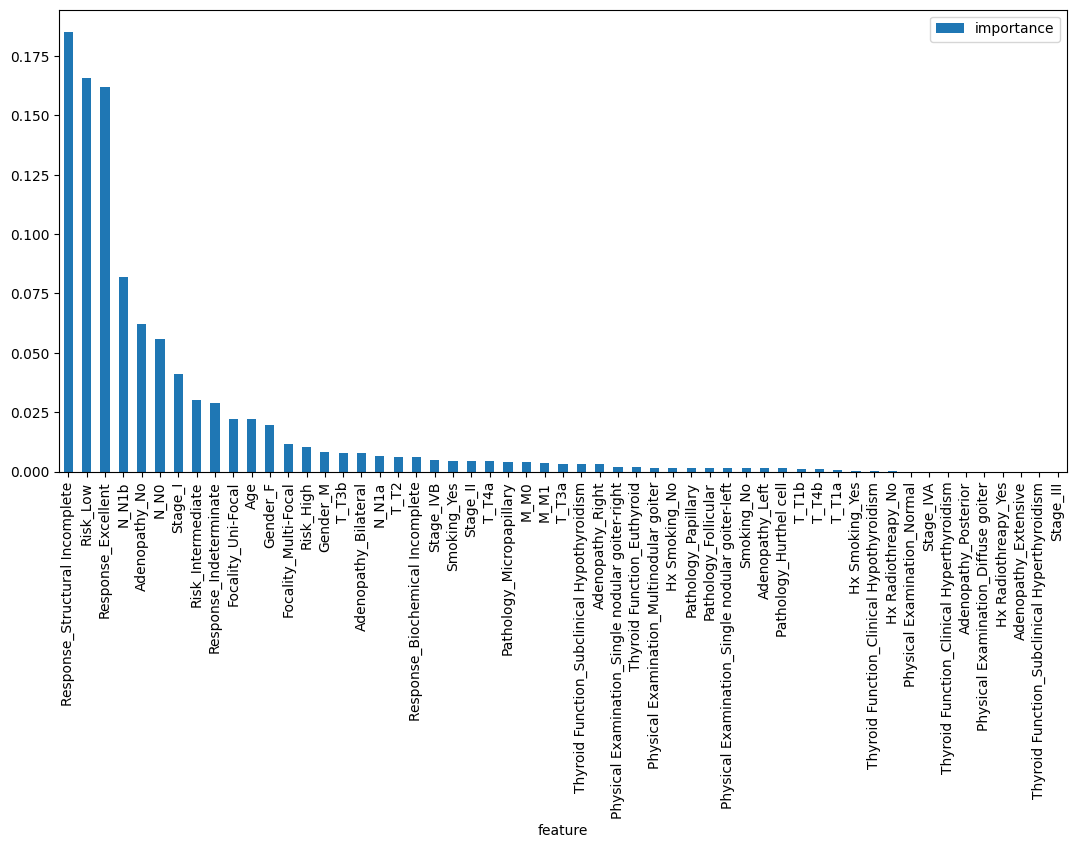

In [ ]:
#plot the feature importance
feature_importances_df.plot.bar(x='feature', y='importance',figsize=(13,6),)